In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:45<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:45<00:00, 25.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 102ms/step - loss: 1.3020 - accuracy: 0.6010 - val_loss: 0.5988 - val_accuracy: 0.6734
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5610 - accuracy: 0.7097 - val_loss: 0.5974 - val_accuracy: 0.7208
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4773 - accuracy: 0.7750 - val_loss: 0.4589 - val_accuracy: 0.7844
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4084 - accuracy: 0.8129 - val_loss: 0.5520 - val_accuracy: 0.7344
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3431 - accuracy: 0.8508 - val_loss: 0.5197 - val_accuracy: 0.8016
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2827 - accuracy: 0.8810 - val_loss: 0.5515 - val_accuracy: 0.7958
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2089 - accuracy: 0.9169 - val_loss: 0.5391 - val_ac

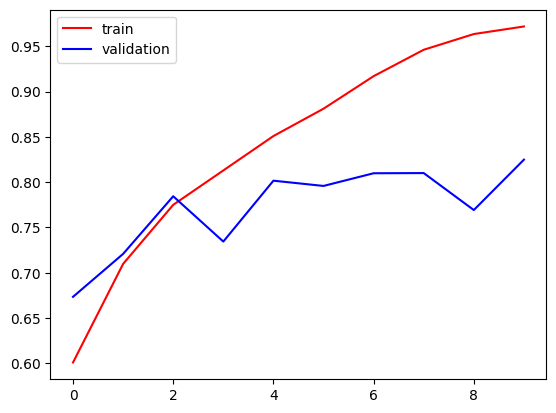

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

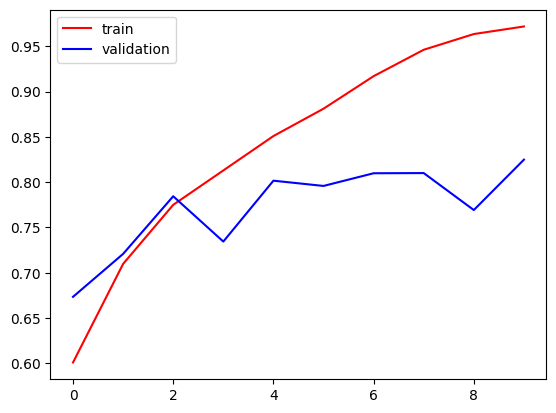

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

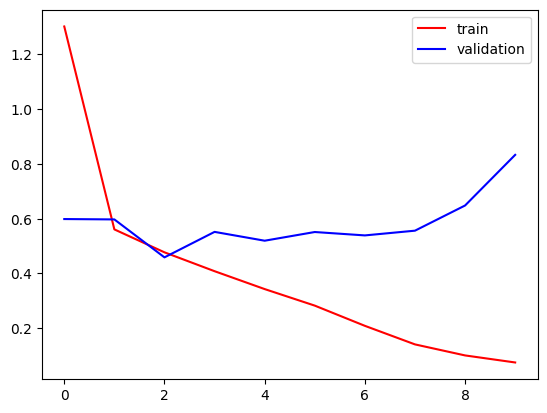

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

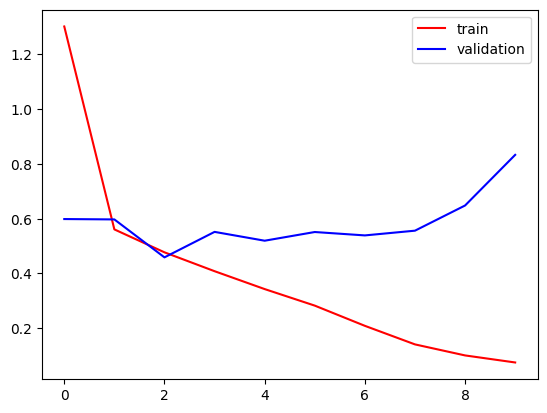

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [19]:
import cv2

In [27]:
test_img = cv2.imread('/content/dog.jpg')

In [33]:
test_img2 = cv2.imread('/content/cat.jpg')

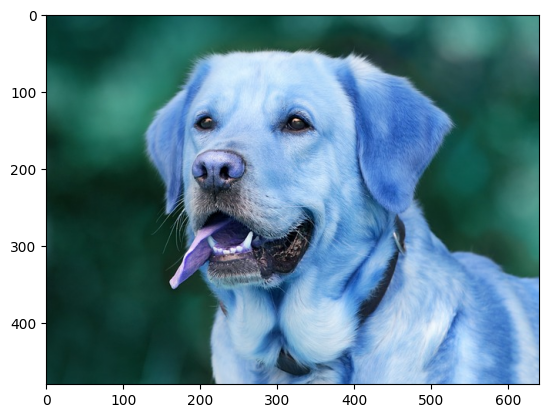

In [28]:
plt.imshow(test_img)

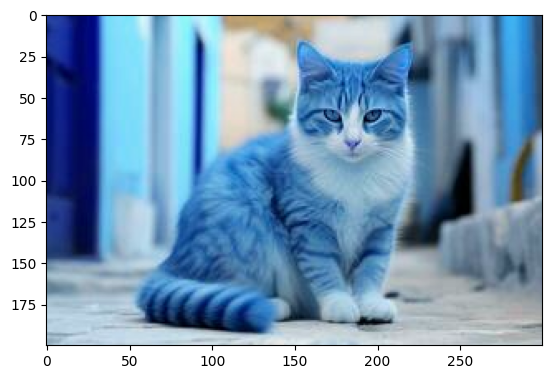

In [34]:
plt.imshow(test_img2)

In [29]:
test_img.shape

(480, 640, 3)

In [35]:
test_img2.shape

(200, 300, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_img2 = cv2.resize(test_img2,(256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
test_input2 = test_img2.reshape((1,256,256,3))

In [39]:
import numpy as np
prediction = model.predict(test_input)
predicted_class = np.argmax(prediction, axis=1)

1/1 [==============================] - 0s 19ms/step


In [41]:
prediction2 = model.predict(test_input2)
predicted_class2 = np.argmax(prediction2, axis=1)

1/1 [==============================] - 0s 29ms/step


In [42]:
# Decode the predicted class
if predicted_class2[0] == 0:
    print('Predicted class: Cat')
else:
    print('Predicted class: Dog')

Predicted class: Cat


In [43]:
import os
from google.colab import drive
from tensorflow.keras.models import save_model

In [44]:
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
folder_path = "/content/drive/MyDrive/CNN simple implementation"
os.makedirs(folder_path, exist_ok = True)

In [46]:
model_path = os.path.join(folder_path,'Cats_Dogs_CNN.h5')
model.save(model_path)
print("Model saved at:", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: /content/drive/MyDrive/CNN simple implementation/Cats_Dogs_CNN.h5
